In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

import datetime

import warnings
warnings.filterwarnings('ignore')

In [97]:
! pip install scikit-optimize

! pip install 'scikit-optimize[plots]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

from xgboost.sklearn import XGBClassifier

In [99]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

In [100]:
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

In [101]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:
#Set option to dislay many rows
pd.set_option('display.max_columns', 100)

In [103]:
from google.colab import drive

In [104]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

### Initial Data Exploration and Visualization

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.

**Details about the column names:**

1. Store - a unique Id for each store.

2. Sales - the turnover for any given day

3. Customers - the number of customers on a given day.

4. Open - an indicator for whether the store was open:

 *   0 = closed
 *   1 = open

5. StateHoliday - indicates a state holiday; 

 *   a = public holiday
 *   b = Easter holiday
 *   c = Christmas
 *   0 = None

6. choolHoliday - indicates if the (Store, Date) was affected by the closure of public schools.

7. StoreType - differentiates between 4 different store models: a, b, c, d.

8. Assortment - describes an assortment level:
 * a = basic
 * b = extra
 * c = extended

9. CompetitionDistance - distance in meters to the nearest competitor store.

10. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened.

11. Promo - indicates whether a store is running a promo on that day.

12. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 

 *   0 = store is not participating
 *   1 = store is participating

13. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2.

14. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.

In [107]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [108]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [109]:
df.shape

(1017209, 9)

In [110]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000
mean,558.430,3.998,5773.819,633.146,0.830,0.382,0.179
std,321.909,1.997,3849.926,464.412,0.376,0.486,0.383
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,280.000,2.000,3727.000,405.000,1.000,0.000,0.000
50%,558.000,4.000,5744.000,609.000,1.000,0.000,0.000
75%,838.000,6.000,7856.000,837.000,1.000,1.000,0.000
max,1115.000,7.000,41551.000,7388.000,1.000,1.000,1.000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [112]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [113]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [114]:
df['Store'].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

In [115]:
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [116]:
df['Promo'].value_counts()
df['Open'].value_counts()
df['StateHoliday'].value_counts()
df['SchoolHoliday'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

1    844392
0    172817
Name: Open, dtype: int64

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [117]:
df['Sales'].unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [118]:
df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1de483cfd0>,
      dtype=object)

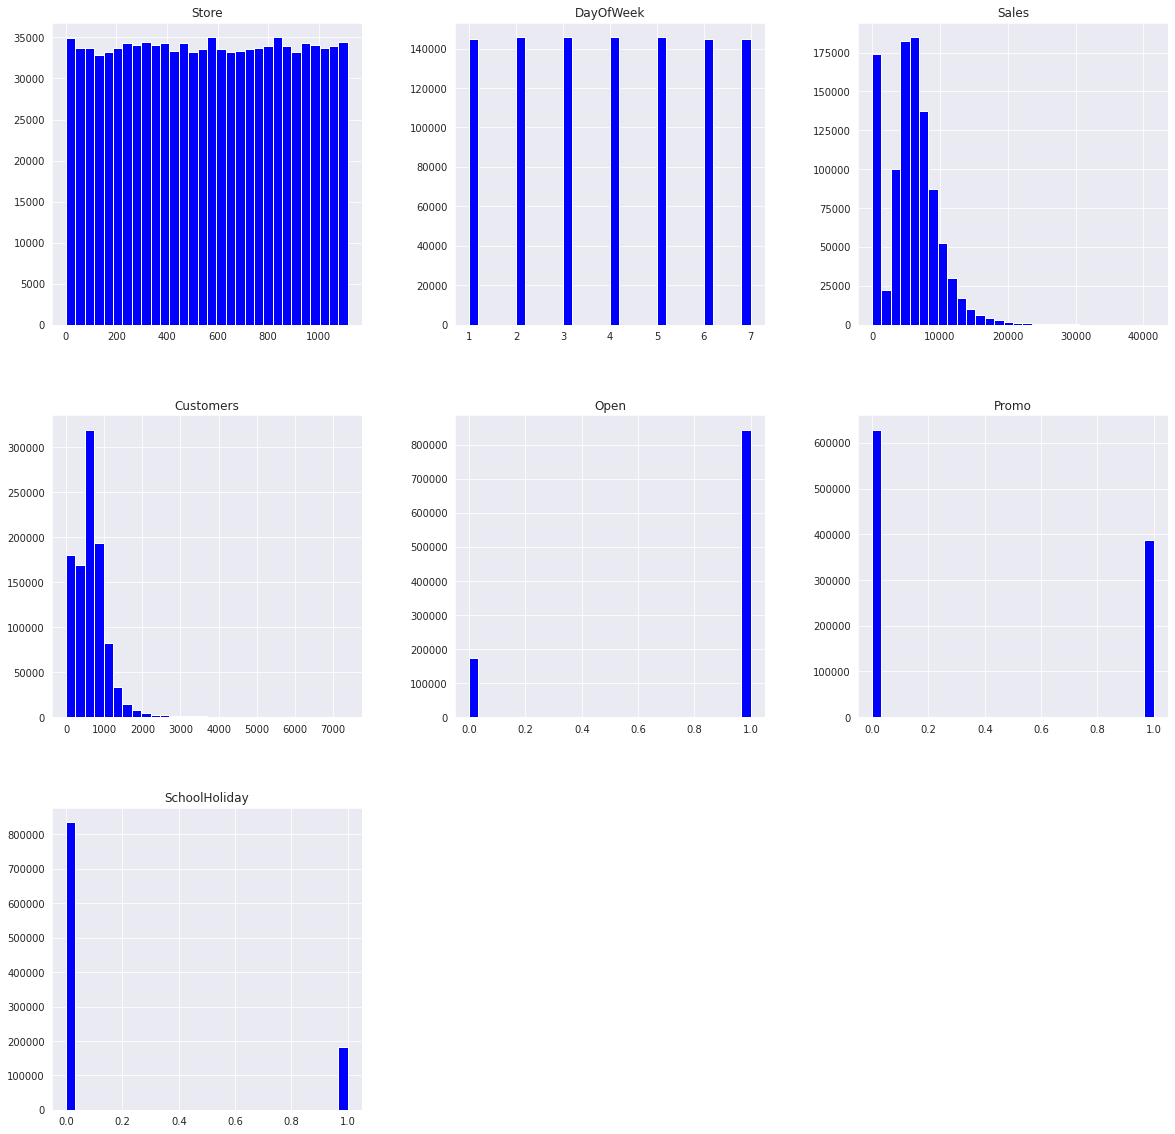

In [119]:
df.hist(bins = 30, figsize=(20, 20), color = 'b')

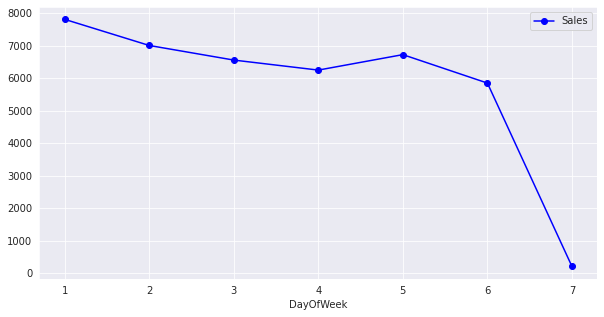

In [120]:
axis = df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')

In [121]:
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [122]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import os,requests,io

In [123]:
#target variable is Sales


In [124]:
sf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

In [125]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [126]:
sf.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [127]:
sf.shape

(1115, 10)

In [128]:
sf.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [129]:
sf = sf.dropna(how='any',axis=0)

print(sf)

      Store StoreType Assortment  CompetitionDistance  \
1         2         a          a              570.000   
2         3         a          a            14130.000   
10       11         a          c              960.000   
13       14         a          a             1300.000   
14       15         d          c             4110.000   
...     ...       ...        ...                  ...   
1104   1105         c          c              330.000   
1105   1106         a          c             5330.000   
1106   1107         a          a             1400.000   
1108   1109         c          a             3490.000   
1110   1111         a          a             1900.000   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1                        11.000                  2007.000       1   
2                        12.000                  2006.000       1   
10                       11.000                  2011.000       1   
13                        3.000        

In [130]:
sf.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
10,11,a,c,960.000,11.000,2011.000,1,1.000,2012.000,"Jan,Apr,Jul,Oct"
13,14,a,a,1300.000,3.000,2014.000,1,40.000,2011.000,"Jan,Apr,Jul,Oct"
14,15,d,c,4110.000,3.000,2010.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"


In [131]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [132]:
sf.shape

(365, 10)

## Feature Engineering 

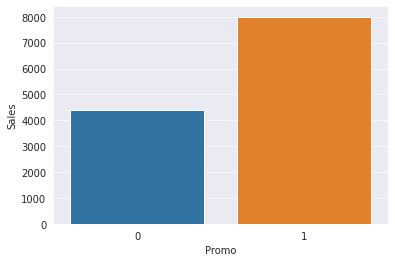

In [133]:
#Checking the effect of Promotion on Sales
sns.barplot(x = df['Promo'], y = df['Sales'])
plt.show()

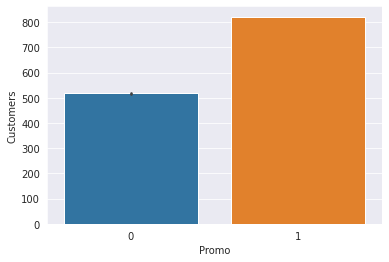

In [134]:
#Checking the effect of Promotion on Customers
sns.barplot(x = df['Promo'], y = df['Customers'])
plt.show()

In [136]:
#Customers and Sales increase when there are promotions running.

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Sales vs Customers')

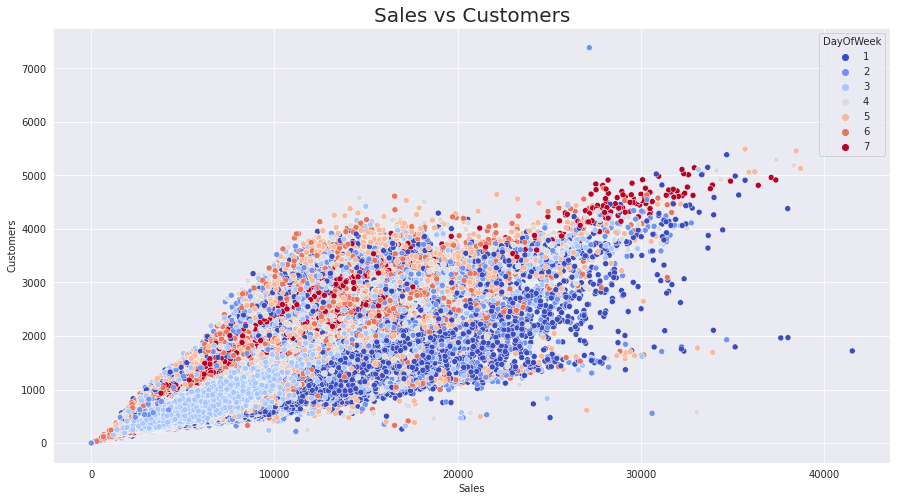

<Figure size 1080x288 with 0 Axes>

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


Text(0.5, 1.0, 'Count of weekdays')

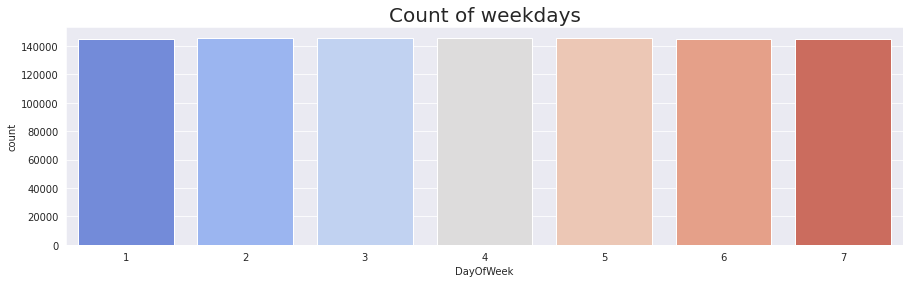

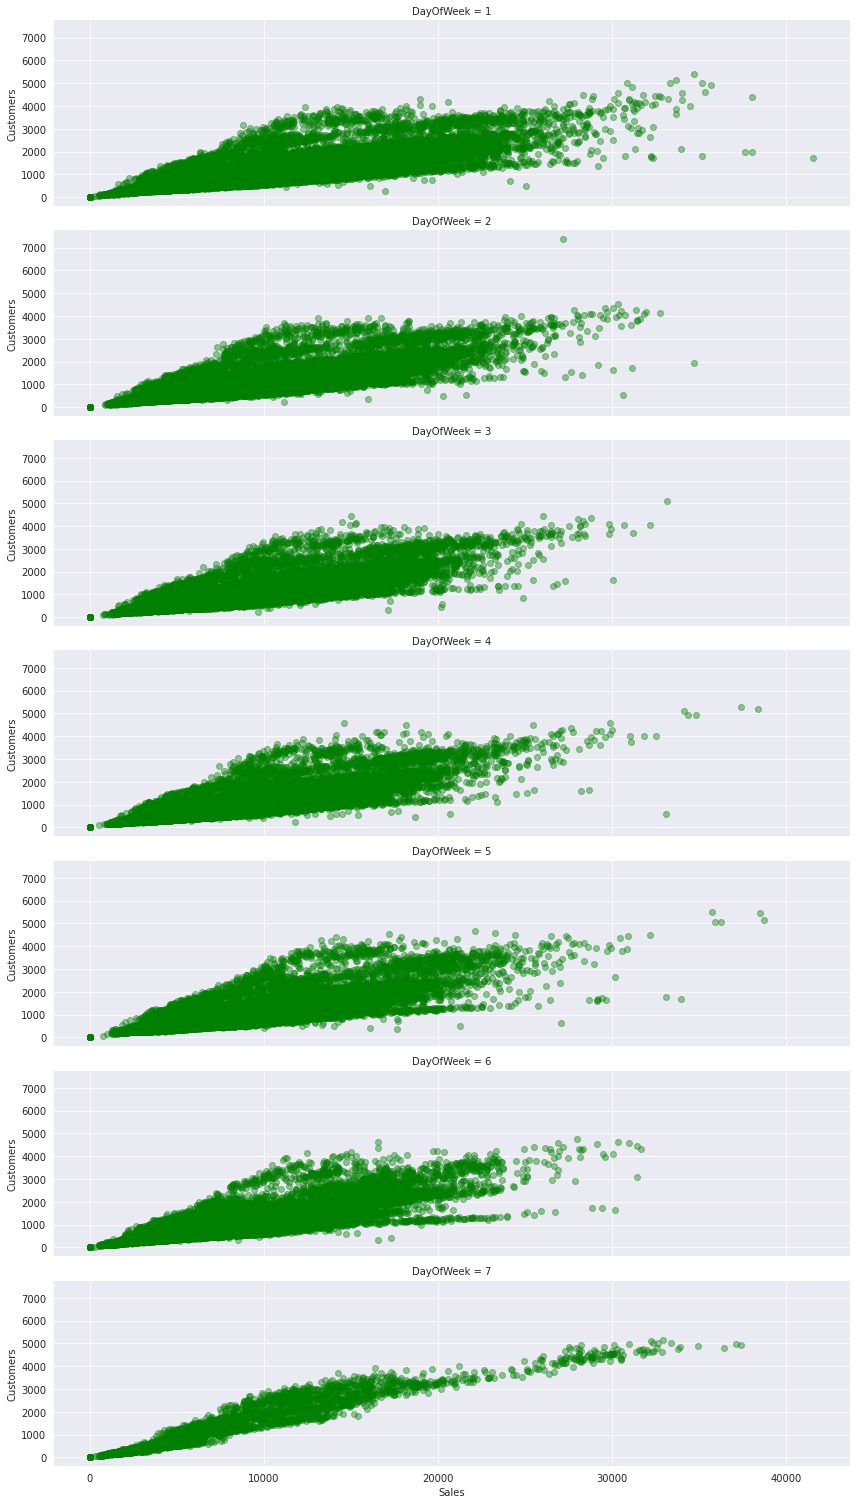

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Sales Statistics')

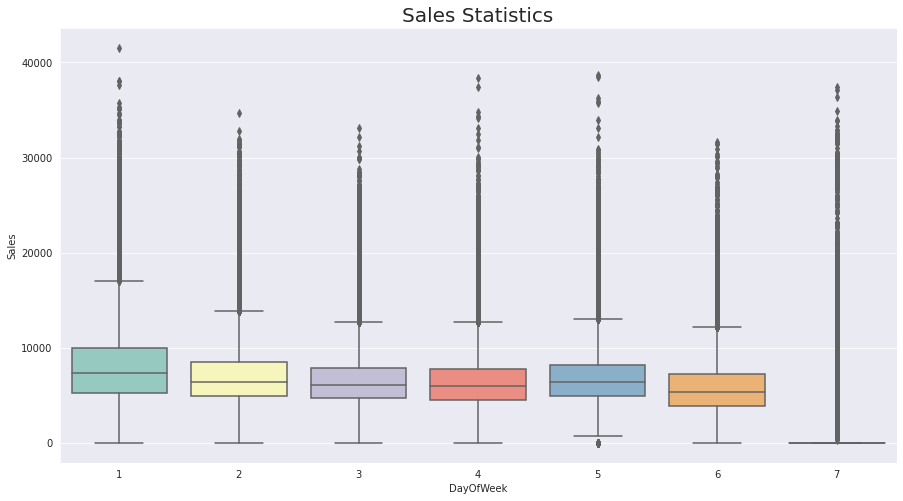

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Customers Statistics')

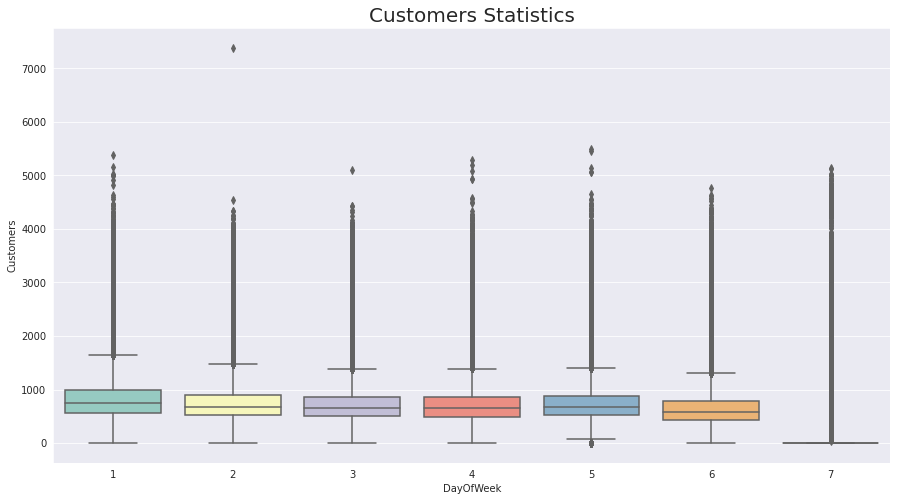

In [137]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=df,hue='DayOfWeek',palette='coolwarm')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# Count of Weekdays 
plt.figure(figsize=(15,4))
print(df['DayOfWeek'].value_counts())
sns.countplot('DayOfWeek',data=df,palette='coolwarm')
plt.title('Count of weekdays',fontdict={'fontsize':20})
plt.show()

# Weekdays wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='DayOfWeek',data=df,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='green',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(15,8))
sns.boxplot(y='Sales',x='DayOfWeek',data=df,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()


# Boxplot - "Customers"
plt.figure(figsize=(15,8))
sns.boxplot(y='Customers',x='DayOfWeek',data=df,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Sales vs Customers')

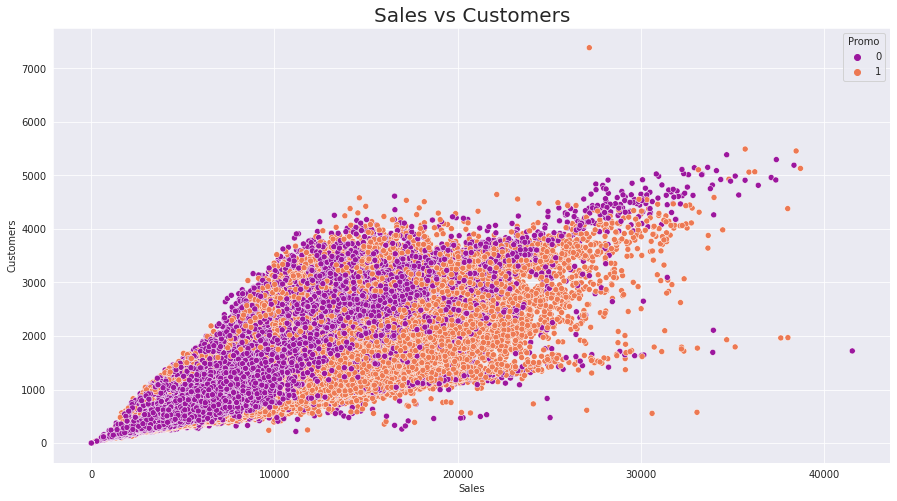

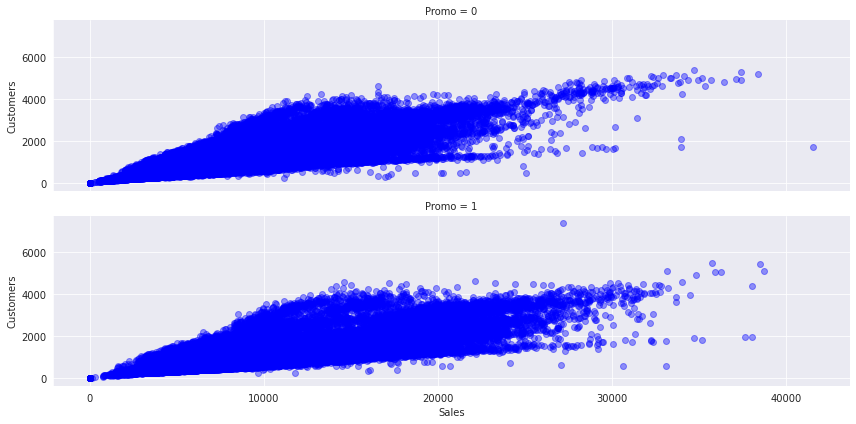

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Sales Statistics')

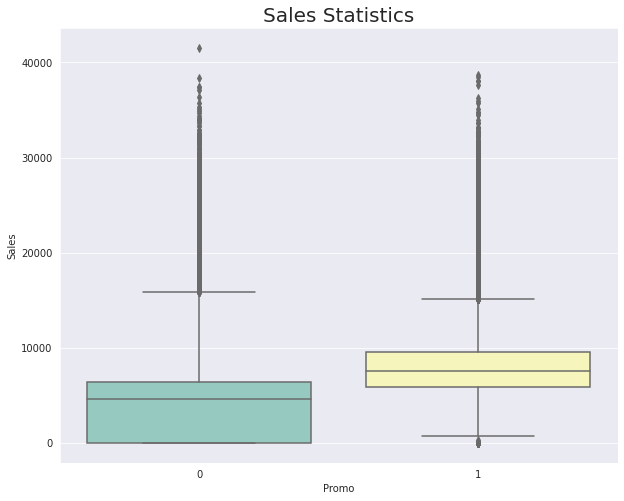

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Customers Statistics')

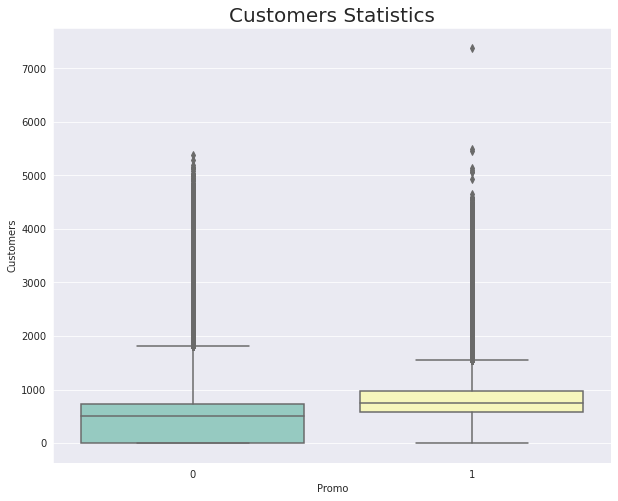

In [138]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=df, hue='Promo',palette='plasma')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# Promo wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='Promo',data=df,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='blue',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Promo',data=df,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='Promo',data=df,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Sales vs Customers')

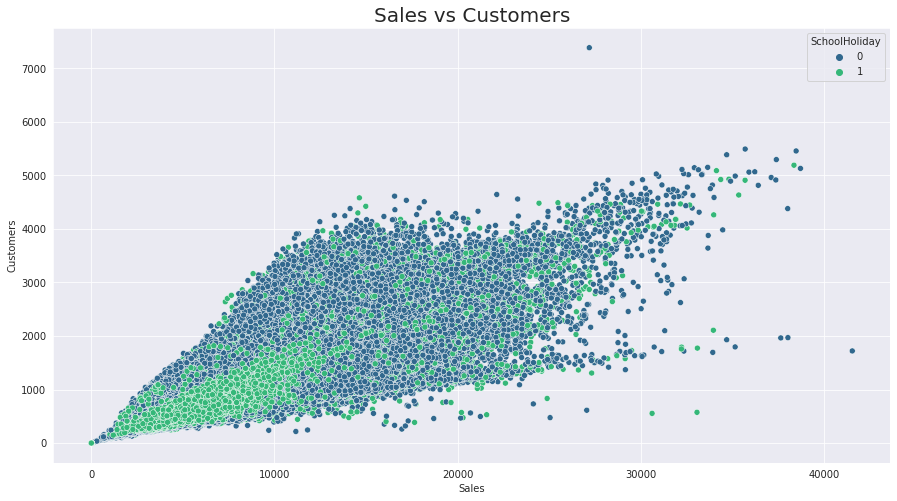

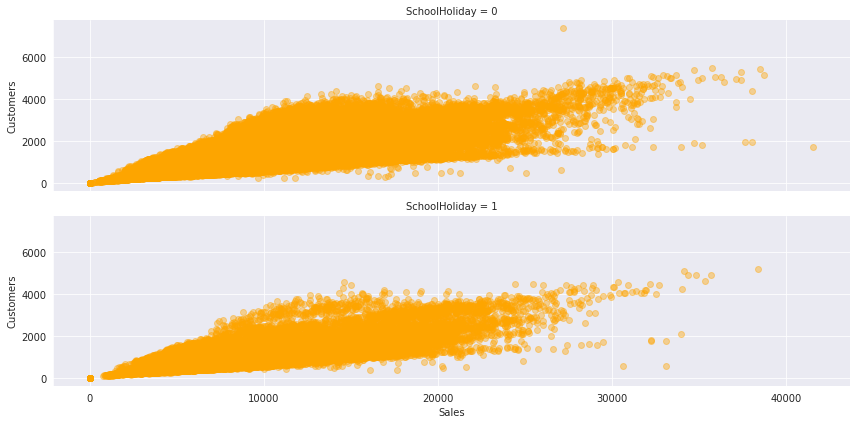

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Sales Statistics')

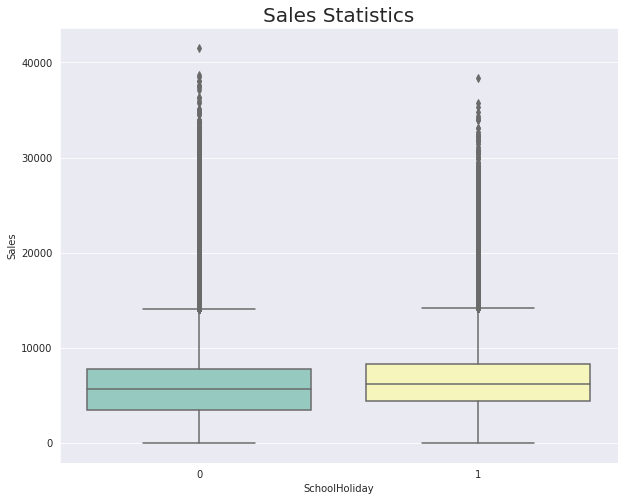

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Customers Statistics')

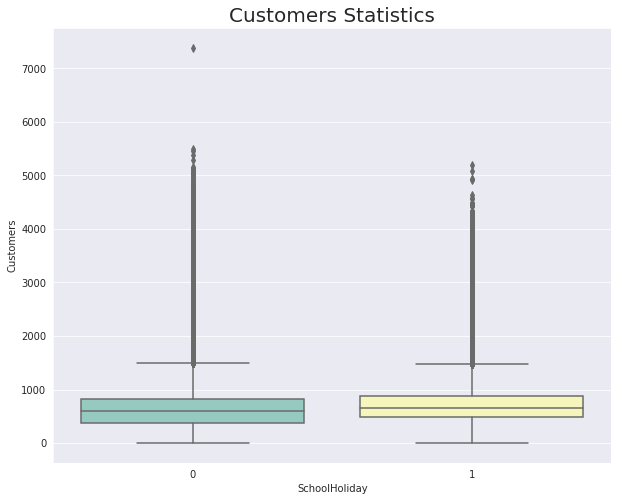

In [139]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=df,hue='SchoolHoliday',palette='viridis')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# State Holiday wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='SchoolHoliday',data=df,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='orange',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='SchoolHoliday',data=df,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='SchoolHoliday',data=df,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

In [140]:
# Making new column of sales per customers 
df['SalesPerCustomer']=df['Sales']/df['Customers']
df['SalesPerCustomer']

0          9.483
1          9.702
2         10.127
3          9.342
4          8.626
           ...  
1017204      NaN
1017205      NaN
1017206      NaN
1017207      NaN
1017208      NaN
Name: SalesPerCustomer, Length: 1017209, dtype: float64

In [141]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.483
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702
2,3,5,2015-07-31,8314,821,1,1,0,1,10.127
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626


In [142]:
pd.options.display.float_format='{:.3f}'.format # in order to show number upto 3 decimal place

# avg_store Dataframe containing columns : 'Average Sales','Average Customers','Average Sales Per Customer'
avg_store=df.groupby('Store')[['Sales','Customers','SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x : 'Avg_' + x,inplace=True)
avg_store.reset_index(inplace=True)

# Adding column Max_Customers(containing maximum value of customers) to avg_store Dataframe 
Max_customer=df.groupby('Store')['Customers'].max()
avg_store=pd.merge(avg_store,Max_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Max_Customers'},inplace=True)

# Adding column Min_Customers(containing mimimum value of customers) to avg_store Dataframe 
Min_customer=df.groupby('Store')['Customers'].min()
avg_store=pd.merge(avg_store,Min_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Min_Customers'},inplace=True)

# Adding column Std_Customers(containing Standard Deviation value of customers) to avg_store Dataframe 
Std_customer=df.groupby('Store')['Customers'].std()
avg_store=pd.merge(avg_store,Std_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Std_Customers'},inplace=True)

# Adding column Med_Customers(containing Median value of customers) to avg_store Dataframe 
Med_customer=df.groupby('Store')['Customers'].median()
avg_store=pd.merge(avg_store,Med_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Med_Customers'},inplace=True)

avg_store.head()

# In order to capture all the variability of customer columns, these much columns are made 

,Store,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,1,3945.705,467.646,8.393,1130,0,228.931,529.000
1,2,4122.992,486.046,8.408,1164,0,260.285,542.000
2,3,5741.254,620.287,9.118,1579,0,323.366,705.000
3,4,8021.770,1100.057,7.250,2216,0,526.187,1261.500
4,5,3867.110,444.361,8.611,1081,0,253.051,537.000


In [143]:
# Merging avg_store with store
sf=pd.merge(sf,avg_store,how='inner',on='Store')
sf.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",4122.992,486.046,8.408,1164,0,260.285,542.000
1,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct",5741.254,620.287,9.118,1579,0,323.366,705.000
2,11,a,c,960.000,11.000,2011.000,1,1.000,2012.000,"Jan,Apr,Jul,Oct",6683.955,940.544,7.045,2849,0,470.841,1074.000
3,14,a,a,1300.000,3.000,2014.000,1,40.000,2011.000,"Jan,Apr,Jul,Oct",4555.386,522.201,8.650,1169,0,268.053,616.000
4,15,d,c,4110.000,3.000,2010.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct",5553.620,552.131,9.953,1259,0,265.399,625.000


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Average sale against Competition Distance')

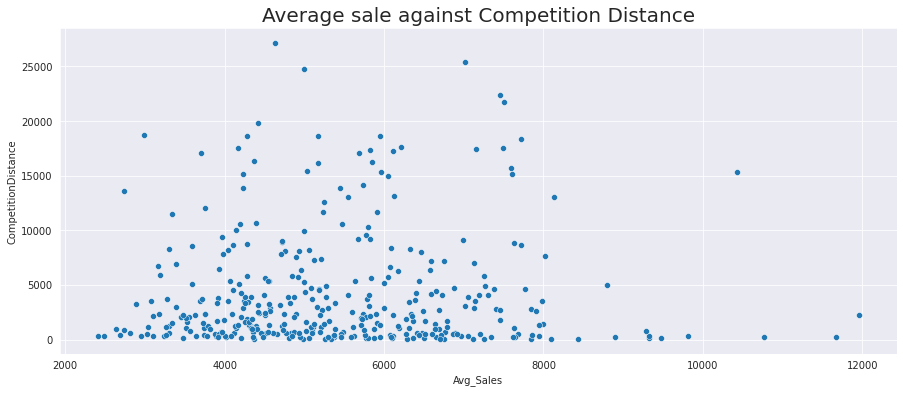

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Competition Distance distribution')

(0.0, 80000.0)

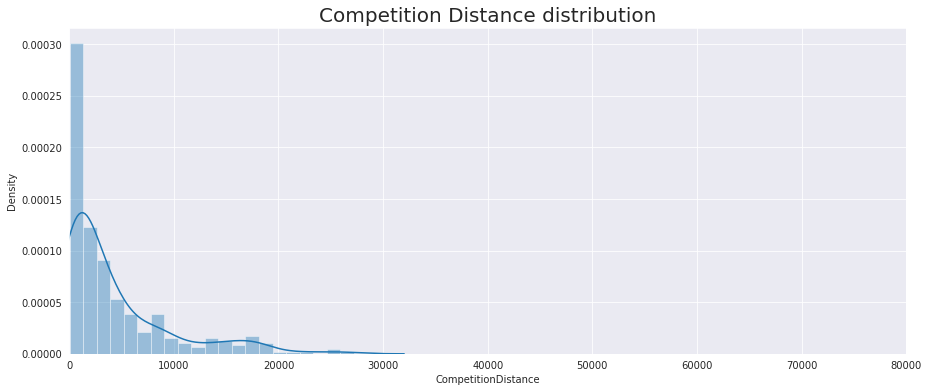

In [144]:
# Scatter plot - Average sale against Competition Distance
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.scatterplot(x='Avg_Sales',y='CompetitionDistance',data=sf)
plt.title('Average sale against Competition Distance',fontdict={'fontsize':20})
plt.show()

# Visualization of Competition Distance data
plt.figure(figsize=(15,6))
sns.distplot(sf['CompetitionDistance'])
plt.title('Competition Distance distribution',fontdict={'fontsize':20})
plt.xlim(0,80000)
plt.show()

Text(0.5, 1.0, 'Average Customers Vs Average Sales')

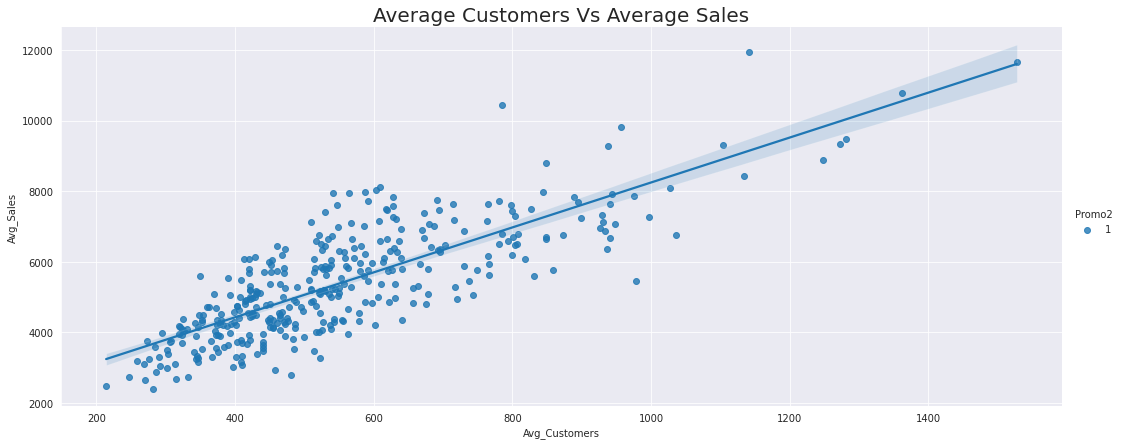

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Average sale per customers Statistics')

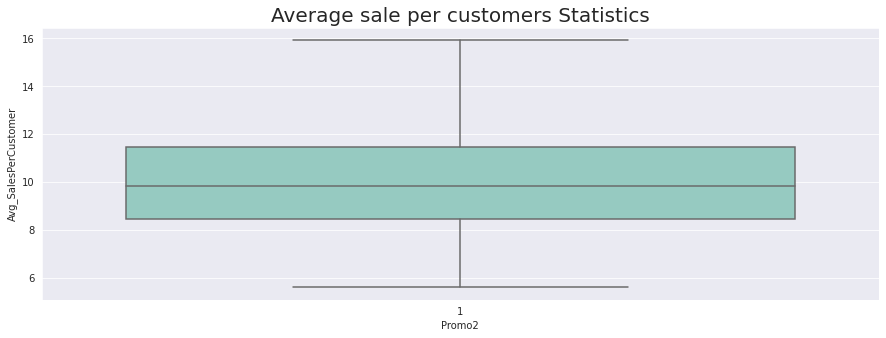

Text(0.5, 1.0, 'Maximum Average Customers Vs Minimum Average Customers')

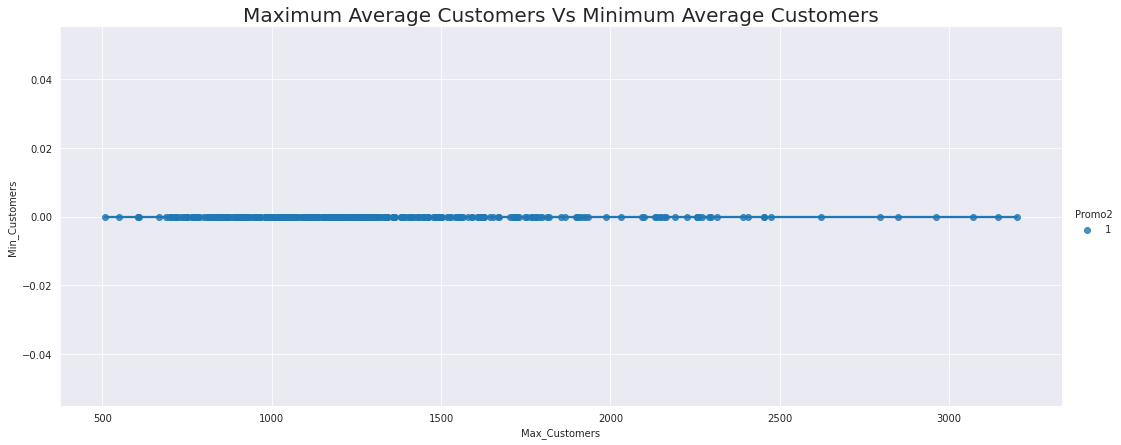

In [145]:
# scatter plot - Average Customers against Average Sales
sns.lmplot(x='Avg_Customers',y='Avg_Sales',hue='Promo2',data=sf,height=6,aspect=2.5)
plt.title('Average Customers Vs Average Sales', fontdict={'fontsize':20})
plt.show()

# boxplot - Average sale per customers
plt.figure(figsize=(15,5))
sns.boxplot(x='Promo2',y='Avg_SalesPerCustomer',data=sf,palette='Set3')
plt.title('Average sale per customers Statistics', fontdict={'fontsize':20})
plt.show()

# scatter plot - Maximum Average Customers against Minimum Average Customers
sns.lmplot(x='Max_Customers',y='Min_Customers',hue='Promo2',data=sf,height=6,aspect=2.5)
plt.title('Maximum Average Customers Vs Minimum Average Customers', fontdict={'fontsize':20})
plt.show()

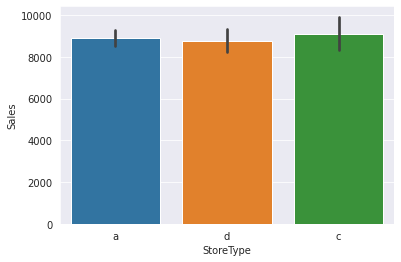

In [146]:
sns.barplot(x = sf['StoreType'], y = df['Sales'])
plt.show()

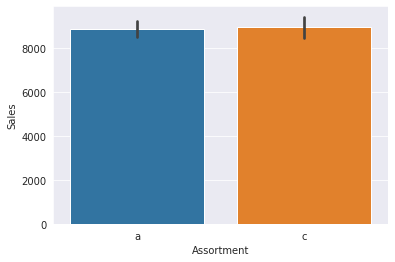

In [147]:
sns.barplot(x = sf['Assortment'], y = df['Sales'])
plt.show()

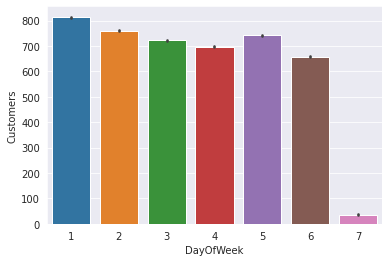

In [148]:
sns.barplot(x = df['DayOfWeek'], y = df['Customers'])
plt.show()

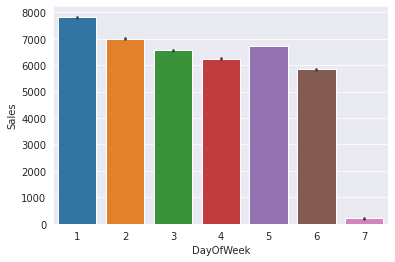

In [149]:
sns.barplot(x = df['DayOfWeek'], y = df['Sales'])
plt.show()

In [150]:
df['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

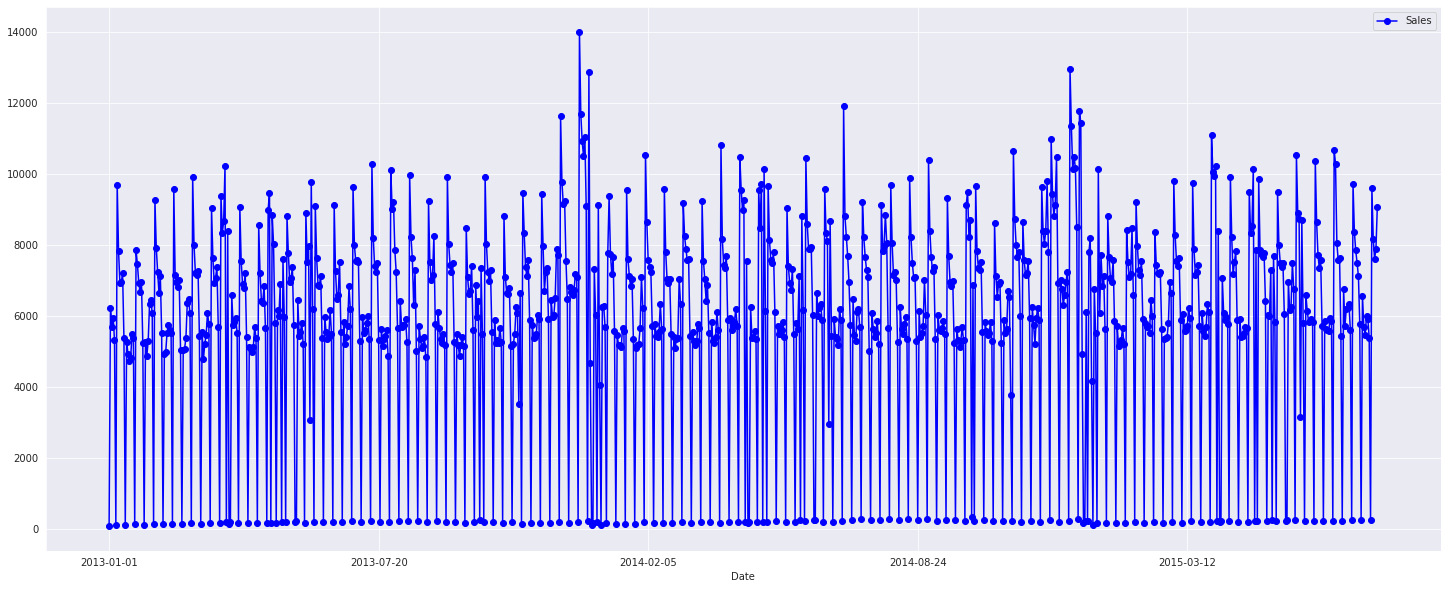

In [151]:
axis = df.groupby('Date')[['Sales']].mean().plot(figsize = (25,10), marker = 'o', color = 'b')

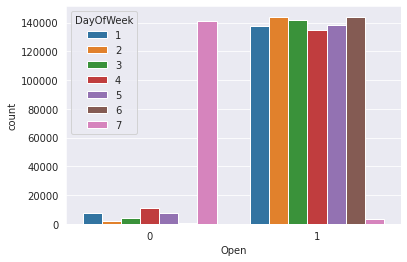

In [152]:
sns.countplot(x = df['Open'], hue = df['DayOfWeek'])
plt.show()

#Most of the stores remained closed during Sundays.

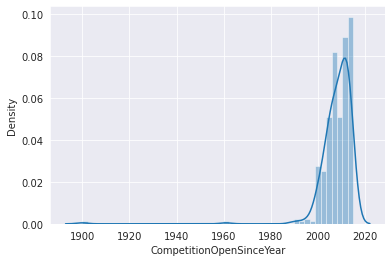

In [153]:
sns.distplot(sf['CompetitionOpenSinceYear'])
plt.show()

#Most of the stores have their competition opened after year 2000.

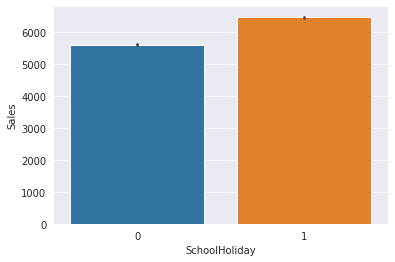

In [154]:
sns.barplot(x = df['SchoolHoliday'], y = df['Sales'])
plt.show()
#School Holidays have a positive impact on the sales

## Pipelining

In [155]:
col_names = list(df.columns)
col_names

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'SalesPerCustomer']

In [156]:
#df dataset
cat_columns = ['DayOfWeek','Open','Promo','SchoolHoliday']
cat_columns

['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday']

In [157]:
num_columns = ['Store','Customers']
num_columns

['Store', 'Customers']

In [158]:
p_cat = Pipeline([
                   ('impute', SimpleImputer(strategy = 'most_frequent')),  # Impute object to impute cat_data
                   ('ohe', OneHotEncoder())                                # One hot encode object  
                  ])

In [159]:
p_cat.fit_transform(df[cat_columns])

<1017209x13 sparse matrix of type '<class 'numpy.float64'>'
	with 4068836 stored elements in Compressed Sparse Row format>

In [160]:
p_num = Pipeline([
                  ('impute', SimpleImputer(strategy = 'median')),         # Impute object to impute numerical data
                  ('ss', StandardScaler())                                # StandardScale object to normalize numerical data
                  ]
                 )

In [161]:
p_num.fit_transform(df[num_columns])

array([[-1.73164032, -0.16826876],
       [-1.72853385, -0.01754036],
       [-1.72542738,  0.40449914],
       ...,
       [ 1.72275751, -1.36332959],
       [ 1.72586398, -1.36332959],
       [ 1.72897045, -1.36332959]])

In [162]:
ct = ColumnTransformer( 
                    [
                      ('cat_pipe', p_cat, cat_columns),     # p_cat pipe to process upon cat_columns
                      ('num_pipe', p_num, num_columns)      # p_num pipe to process upon num_columns
                    ]
                  )

In [163]:
ct.fit_transform(df)

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.73164032, -0.16826876],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.72853385, -0.01754036],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.72542738,  0.40449914],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.72275751, -1.36332959],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.72586398, -1.36332959],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.72897045, -1.36332959]])

In [164]:
main_pipe = Pipeline(
                      [
                       ('ct', ct),      # ct (column transformer object)
                       ('dt', DecisionTreeClassifier())       # DecisionTreeClassifier object
                      
                      ]
                     )

In [165]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'SalesPerCustomer'],
      dtype='object')

## Cross-Validation

In [166]:
y_train = df.pop('Sales')
X_train = df

In [167]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from sklearn.inspection import permutation_importance
import time
import os
import gc
import random
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import plot_roc_curve

In [168]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA

In [169]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        
            
            )
            ]

In [170]:
pipe_xg = Pipeline(steps_xg)

In [171]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()




--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [172]:
parameters = {'xg__learning_rate':  [0.03, 0.05],
              'xg__n_estimators':   [200,  300],
               'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              } 

In [173]:
clf = GridSearchCV(pipe_xg,            
                   parameters,         
                   n_jobs = 2,         
                   cv =2 ,             
                   verbose =1,         
                   scoring = ['accuracy', 'roc_auc'], 
                   refit = 'roc_auc'   
                  )

#Hyperparameter tuning both using Grid Search and Randomized Seach

In [174]:
parameters = {'xg__learning_rate':  [0.03, 0.05],
               'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
}

In [175]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [176]:
le=LabelEncoder()

In [177]:
sf.head()
print("\n-----\n")
sf.dtypes
print("\n-----\n")
sf.isnull().sum()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",4122.992,486.046,8.408,1164,0,260.285,542.000
1,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct",5741.254,620.287,9.118,1579,0,323.366,705.000
2,11,a,c,960.000,11.000,2011.000,1,1.000,2012.000,"Jan,Apr,Jul,Oct",6683.955,940.544,7.045,2849,0,470.841,1074.000
3,14,a,a,1300.000,3.000,2014.000,1,40.000,2011.000,"Jan,Apr,Jul,Oct",4555.386,522.201,8.650,1169,0,268.053,616.000
4,15,d,c,4110.000,3.000,2010.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct",5553.620,552.131,9.953,1259,0,265.399,625.000



-----



Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Avg_Sales                    float64
Avg_Customers                float64
Avg_SalesPerCustomer         float64
Max_Customers                  int64
Min_Customers                  int64
Std_Customers                float64
Med_Customers                float64
dtype: object


-----



Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Avg_Sales                    0
Avg_Customers                0
Avg_SalesPerCustomer         0
Max_Customers                0
Min_Customers                0
Std_Customers                0
Med_Customers                0
dtype: int64

In [178]:
sf['Store']=le.fit_transform(sf['Store'])
sf['StoreType']=le.fit_transform(sf['StoreType'])
sf['Assortment']=le.fit_transform(sf['Assortment'])
sf['CompetitionDistance']=le.fit_transform(sf['CompetitionDistance'])
sf['CompetitionOpenSinceMonth']=le.fit_transform(sf['CompetitionOpenSinceMonth'])
sf['CompetitionOpenSinceYear']=le.fit_transform(sf['CompetitionOpenSinceYear'])
sf['Promo2']=le.fit_transform(sf['Promo2'])
sf['Promo2SinceWeek']=le.fit_transform(sf['Promo2SinceWeek'])
sf['Promo2SinceYear']=le.fit_transform(sf['Promo2SinceYear'])
sf['PromoInterval']=le.fit_transform(sf['PromoInterval'])

In [179]:
X_test=sf

In [180]:
df.tail()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
1017204,1111,2,2013-01-01,0,0,0,a,1,NaN
1017205,1112,2,2013-01-01,0,0,0,a,1,NaN
1017206,1113,2,2013-01-01,0,0,0,a,1,NaN
1017207,1114,2,2013-01-01,0,0,0,a,1,NaN
1017208,1115,2,2013-01-01,0,0,0,a,1,NaN


In [181]:
df.dtypes

Store                 int64
DayOfWeek             int64
Date                 object
Customers             int64
Open                  int64
Promo                 int64
StateHoliday         object
SchoolHoliday         int64
SalesPerCustomer    float64
dtype: object

In [182]:
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60    

Fitting 2 folds for each of 32 candidates, totalling 64 fits


ValueError: ignored